In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df=pd.read_csv('train')
df_test=pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


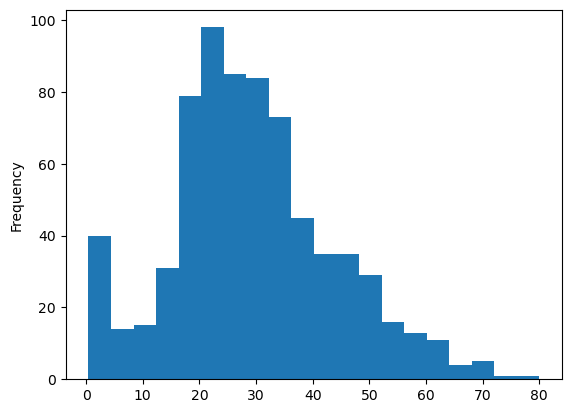

In [4]:
df['Age'].plot(kind='hist',bins=20)
plt.show()

In [29]:
df.drop(['Name','Fare','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['Name','Fare','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [31]:
df['Family']=df['SibSp']+df['Parch']+1
df_test['Family']=df_test['SibSp']+df_test['Parch'] +1

In [32]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test.drop(['Parch','SibSp'],axis=1,inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family
0,1,0,3,male,22.0,S,2
1,2,1,1,female,38.0,C,2
2,3,1,3,female,26.0,S,1
3,4,1,1,female,35.0,S,2
4,5,0,3,male,35.0,S,1


In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64

In [35]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Embarked        0
Family          0
dtype: int64

In [36]:
df['Age']=df['Age'].fillna(df['Age'].median())
df_test['Age']=df_test['Age'].fillna(df_test['Age'].median())

In [37]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
df['Adult']=0
df_test['Adult']=0

In [39]:
df['Adult'][df['Age']>=18]=1
df_test['Adult'][df_test['Age']>=18]=1

C:\Users\chinni\AppData\Local\Temp\ipykernel_1520\3662042217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adult'][df['Age']>=18]=1
C:\Users\chinni\AppData\Local\Temp\ipykernel_1520\3662042217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Adult'][df_test['Age']>=18]=1


In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family,Adult
0,1,0,3,male,22.0,S,2,1
1,2,1,1,female,38.0,C,2,1
2,3,1,3,female,26.0,S,1,1
3,4,1,1,female,35.0,S,2,1
4,5,0,3,male,35.0,S,1,1


In [15]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
df['Adult'].value_counts()

1    778
0    113
Name: Adult, dtype: int64

In [17]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### we can clearly see that there is imbalance data in Survived Feature


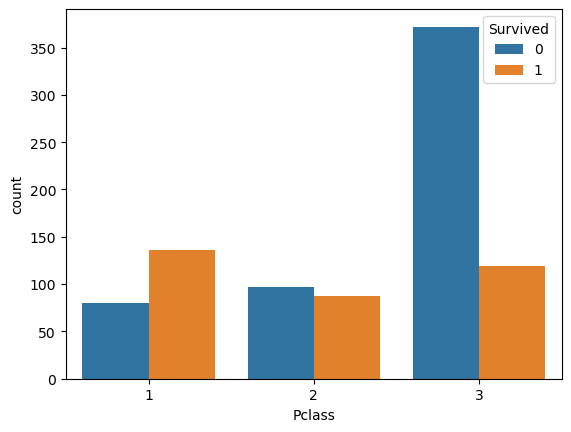

In [18]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

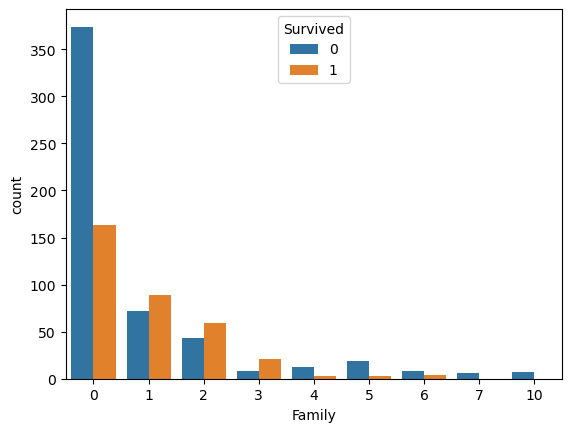

In [19]:
sns.countplot(x='Family',hue='Survived',data=df)
plt.show()

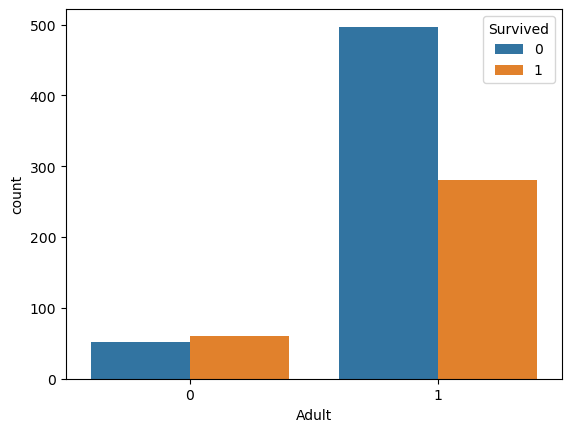

In [20]:
sns.countplot(x='Adult',hue='Survived',data=df)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Embarked     889 non-null    object 
 6   Family       891 non-null    int64  
 7   Adult        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [41]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test['Embarked']=le.fit_transform(df_test['Embarked'])

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Family,Adult
0,1,0,3,1,22.0,2,2,1
1,2,1,1,0,38.0,0,2,1
2,3,1,3,0,26.0,2,1,1
3,4,1,1,0,35.0,2,2,1
4,5,0,3,1,35.0,2,1,1


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier

In [43]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Family,Adult
0,892,3,1,34.5,1,1,1
1,893,3,0,47.0,2,2,1
2,894,2,1,62.0,1,1,1
3,895,3,1,27.0,2,1,1
4,896,3,0,22.0,2,3,1


In [44]:
X_train=df.drop('Survived',axis=1)

In [45]:
y_train=df['Survived']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.2)

In [47]:
rf=RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
y_pred=rf.predict(x_test)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

